In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import csv
import numpy as np
import math
import skvideo.io
from tqdm import tqdm
%matplotlib inline

In [4]:
# constants
data_dir = 'data'
train_data = os.path.join(data_dir, 'train.mp4')
test_data = os.path.join(data_dir, 'test.mp4')
clean_data = 'clean_data'
if os.path.isdir(clean_data):
    clean_train = os.path.join(clean_data, 'train_imgs')
    clean_test = os.path.join(clean_data, 'test_imgs')
else:
    os.mkdir(clean_data)
    os.mkdir(os.path.join(clean_data, 'train_imgs'))
    os.mkdir(os.path.join(clean_data, 'test_imgs'))
    clean_train = os.path.join(clean_data, 'train_imgs')
    clean_test = os.path.join(clean_data, 'test_imgs')


train_frames = 20400
test_frames = 10798

## Dataset construction

In [6]:
labels = pd.read_csv(os.path.join(data_dir, 'train.txt'), header=None, squeeze=True).to_numpy()
assert(len(labels)==train_frames)

In [15]:
def generate_metadata(src_video, tgt_folder, split='train'):
    data_dict = np.empty((0, 3))
    tqdm.write('Reading video...')
    frames = skvideo.io.vread(src_video)
    
    tqdm.write('processing data...')
    for index, img in enumerate(tqdm(frames)):
#         img_path = os.path.join(tgt_folder)
        img_path = os.path.join(tgt_folder, str(index)+'.jpg')
        img_speed = labels[index] if split=='train' else math.nan
        data_dict = np.vstack((data_dict, np.asarray([img_path, index, img_speed])))
        skvideo.io.vwrite(img_path, img)
    data_df = pd.DataFrame({'image_path':data_dict[:,0], 'image_index':data_dict[:,1], 'speed':data_dict[:,2]})
    
    data_df.to_csv(os.path.join(clean_data, split+'_processed.csv'), index=False)
    print('Data processed')
    return

In [14]:
# train data
generate_metadata(train_data, clean_train, 'train')

Reading video...
processing data...
Data processed


In [17]:
# test data
generate_metadata(test_data, clean_test, 'test')

Reading video...


  0%|          | 0/10798 [00:00<?, ?it/s]

processing data...


100%|██████████| 10798/10798 [05:57<00:00, 30.24it/s]


Data processed


### Dataset verification

### train

In [18]:
train_processed = pd.read_csv(os.path.join(clean_data, 'train_processed.csv'))
assert(train_processed.shape[0] == train_frames)
assert(train_processed.shape[1] == 3)

In [19]:
train_processed.head()

,image_path,image_index,speed
0,clean_data/train_imgs/0.jpg,0,28.105569
1,clean_data/train_imgs/1.jpg,1,28.105569
2,clean_data/train_imgs/2.jpg,2,28.106527
3,clean_data/train_imgs/3.jpg,3,28.130404
4,clean_data/train_imgs/4.jpg,4,28.109243


speed: 28.105569
shape: (480, 640, 3)


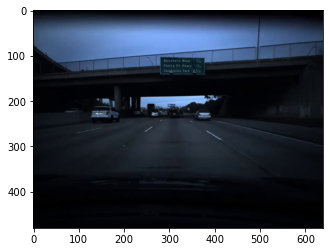

speed: 28.105569
shape: (480, 640, 3)


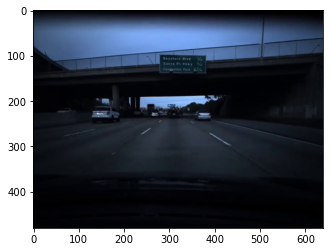

speed: 28.106527000000003
shape: (480, 640, 3)


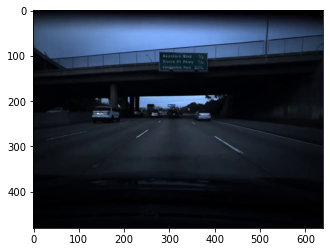

speed: 28.130404
shape: (480, 640, 3)


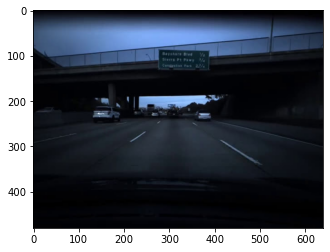

speed: 28.109243
shape: (480, 640, 3)


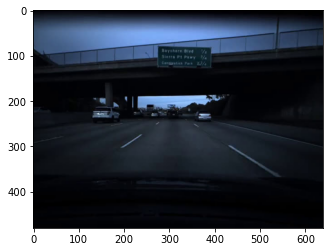

In [20]:
for i in range(5):
    print('speed:',train_processed['speed'][i] )
    img=mpimg.imread(train_processed['image_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()

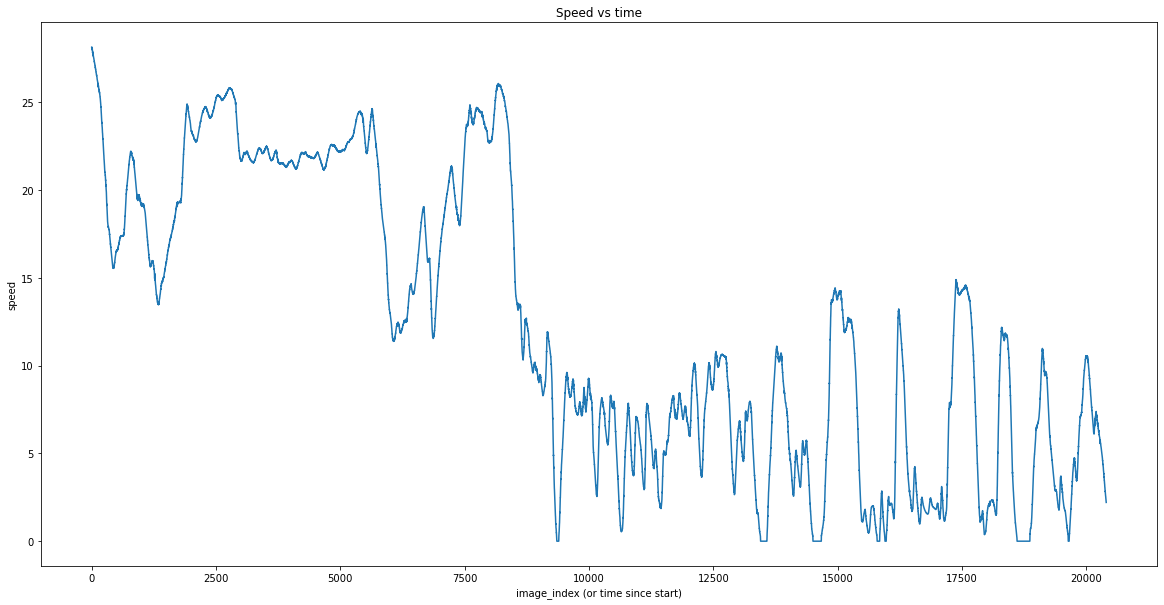

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
plt.plot(train_processed['speed'])
plt.xlabel('image_index (or time since start)')
plt.ylabel('speed')
plt.title('Speed vs time')
plt.show()

### test

In [22]:
test_processed = pd.read_csv(os.path.join(clean_data, 'test_processed.csv'))
assert(test_processed.shape[0] == test_frames)
assert(test_processed.shape[1] == 3)

In [24]:
test_processed.head()

,image_path,image_index,speed
0,clean_data/test_imgs/0.jpg,0,NaN
1,clean_data/test_imgs/1.jpg,1,NaN
2,clean_data/test_imgs/2.jpg,2,NaN
3,clean_data/test_imgs/3.jpg,3,NaN
4,clean_data/test_imgs/4.jpg,4,NaN


speed: nan
shape: (480, 640, 3)


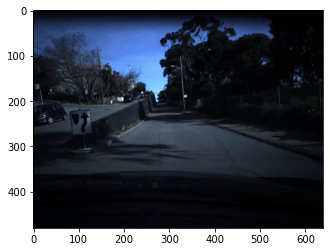

speed: nan
shape: (480, 640, 3)


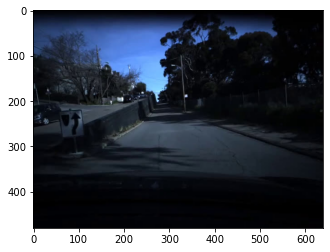

speed: nan
shape: (480, 640, 3)


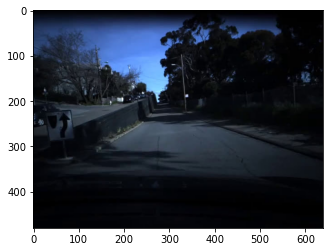

speed: nan
shape: (480, 640, 3)


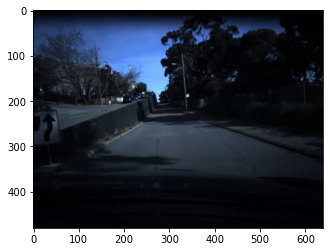

speed: nan
shape: (480, 640, 3)


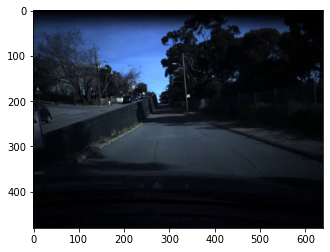

In [25]:
for i in range(5):
    print('speed:',test_processed['speed'][i] )
    img=mpimg.imread(test_processed['image_path'][i])
    print('shape:', img.shape)
    plt.imshow(img)
    plt.show()